In [238]:
setwd('/import/DB/fel/BJTC-204')

In [239]:
load('/import/mdd.rna/GSE101521.rda')

In [240]:
count = expr3

In [241]:
dim(expr3)

[1] 33714    60

In [243]:
rownames(count) = count[,1]

In [244]:
count = count[,-1]

In [248]:
count['SERPINH1',]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINH1,23.89512,31.1991,14.57295,30.94508,26.01062,651.4357,21.21053,1443.247,186.2445,39.98714,...,27.94649,24.57362,96.4509,19.60175,40.79904,19.91537,29.82948,31.49361,16.68676,25.91386


In [259]:
cli

V1,V2,V3,V4
<chr>,<chr>,<int>,<chr>
V35,MDD,19,Male
V36,MDD,67,Male
V37,MDD,53,Male
V40,MDD,69,Male
V45,MDD,62,Male
V47,MDD,66,Male
V49,MDD,68,Female
V53,MDD,57,Female
V57,MDD,58,Female


In [205]:
library(dplyr)

In [206]:
cli$V2 = gsub('MDD-S','MDD',cli$V2) 

In [207]:
table(cli$V2)


CON MDD 
 29  30 

In [208]:
rownames(cli) = cli[,1]

In [209]:
con.sample = cli %>%  dplyr::filter(V2 =='CON') %>% rownames()

In [210]:
MDD.sample = cli %>%  dplyr::filter(V2 =='MDD') %>% rownames()

In [211]:
control = count[,con.sample]
MDD = count[,MDD.sample]

In [234]:
exp <- cbind(control, MDD)

In [235]:
load('prot.rda')

In [214]:
exp = exp[unique(prot),]

In [215]:
exp = na.omit(exp)

In [216]:
dim(exp)

[1] 17684    59

In [217]:
group=c(rep("control",dim(control)[2]),rep("MDD",dim(MDD)[2])) 

In [218]:
save(exp,group,file = 'buik2_s.rda')

In [223]:
library("edgeR")  
library(dplyr)
library(ggrepel)
library(ggplot2)
library(cowplot)

dimnames=list(rownames(exp),colnames(exp))
data=matrix(as.numeric(as.matrix(exp)),nrow=nrow(exp),dimnames=dimnames)
data=avereps(data)
#data=data[rowMeans(data)>1,]
design <- model.matrix(~group)
y <- DGEList(counts=data,group=group)
y <- calcNormFactors(y)
y <- estimateCommonDisp(y)
y <- estimateTagwiseDisp(y)
et <- exactTest(y,pair = c("control","MDD"))
topTags(et)

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
HSPA6,-5.914899,5.419729,1.342071e-15,2.373319e-11
SERPINH1,-2.928651,3.982513,3.841829e-11,3.396945e-07
CCL2,-2.427717,1.896545,7.925580e-09,4.671865e-05
ATF3,-1.841906,3.422898,1.431065e-08,5.383722e-05
SELE,-3.127701,3.007612,1.522202e-08,5.383722e-05
IL1B,-2.478182,1.982892,2.814557e-08,8.295439e-05
FOS,-1.733311,6.216293,4.746023e-08,1.198981e-04
TNFAIP3,-1.669889,2.915842,2.406874e-07,5.320395e-04
DNAJB1,-1.344578,6.975641,5.902713e-07,1.159817e-03


In [224]:
group

[1] "control" "control" "control" "control" "control" "control" "control"
 [8] "control" "control" "control" "control" "control" "control" "control"
[15] "control" "control" "control" "control" "control" "control" "control"
[22] "control" "control" "control" "control" "control" "control" "control"
[29] "control" "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[36] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[43] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[50] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[57] "MDD"     "MDD"     "MDD"

In [225]:
foldChange=0.2
padj=0.05

ordered_tags <- topTags(et, n=100000)
allDiff=ordered_tags$table
allDiff=allDiff[is.na(allDiff$FDR)==FALSE,]
diff=allDiff
diff$group = as.factor(ifelse(diff$PValue < padj & abs(diff$logFC) >= foldChange, 
                             ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
      684     16636       364 

In [257]:
diff2['EDNRB',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
EDNRB,-0.5450228,6.315925,-2.309214,0.02448233,0.7419041,-3.429919,Down


### limma

In [29]:
group_list = group

group_list = factor(group_list,levels = c("control","MDD"))

library(limma)

design <- model.matrix(~0+group_list)
colnames(design)=levels(group_list)
rownames(design)=colnames(exp)

dge <- DGEList(counts=exp)
dge <- calcNormFactors(dge)

v <- voom(dge,design, normalize="quantile")
fit <- lmFit(v, design)



constrasts = paste(rev(levels(group_list)),collapse = "-")
cont.matrix <- makeContrasts(contrasts=constrasts,levels = design) 
fit2=contrasts.fit(fit,cont.matrix)
fit2=eBayes(fit2)

DEG = topTable(fit2, coef=constrasts, n=Inf)
DEG = na.omit(DEG)

tail(DEG,2)

foldChange=0
padj=0.05

diff2=DEG
diff2$group = as.factor(ifelse(diff2$P.Value < padj & abs(diff2$logFC) >= foldChange, 
                             ifelse(diff2$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff2$group)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
QRICH1,-0.0004844427,6.384360,-0.012964322,0.9897004,0.9991758,-5.767084
SOWAHA,-0.0011040581,6.417355,-0.008201419,0.9934842,0.9991758,-5.767127



     Down NoSignifi        Up 
      560     16547       577 

In [30]:
limma_up = diff2 %>%  filter(group == 'Up')%>% rownames()
limma_down = diff2 %>%  filter(group == 'Down')%>% rownames()

In [31]:
edger_up = diff %>%  filter(group == 'Up')%>% rownames()
edger_down = diff %>%  filter(group == 'Down')%>% rownames()

In [32]:
allup = intersect(limma_up,edger_up)

In [33]:
alldown = intersect(limma_down,edger_down)

In [34]:
save(limma_up,limma_down,file = 'dada.rda')

### pca

In [74]:
diff3 = diff2
foldChange=0.5
padj=0.05

In [76]:
diff3$group = as.factor(ifelse(diff3$P.Value < padj & abs(diff3$logFC) >= foldChange, 
                             ifelse(diff3$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff3$group)


     Down NoSignifi        Up 
      147     17441        96 

In [77]:
library(dplyr)

In [78]:
diff1 = diff3 %>%  filter(group != 'NoSignifi')

### 转fpkm

In [109]:
expr = exp %>% tibble::rownames_to_column(.,'Gene')

hg_len = 'All_hg19gene_len.txt'

len = read.table(hg_len,header =T,sep = '\t')
library(tidyverse)
library(dplyr)
merge<-left_join(expr,len,by="Gene")
merge <- na.omit(merge)#删除错误值行​
rownames(merge)<-merge[,1]


merge<-merge[,-1]
head(merge)#最后一列Length是基因长度​
kb <- merge$Length/1000
dim(merge)
countdata <- merge[,1:dim(merge)[2]-1]
rpk <- countdata /kb
tpm <- log2(t(t(rpk)/colSums(rpk) * 1000000)+1)

fpkm <- t(t(rpk)/colSums(countdata) * 10^6)
head(fpkm)

expr = fpkm 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V31,V38,V41,V48,V50,V51,V54,V55,V56,Length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
TSPAN6,77.659131,83.613579,91.08093,90.7157146,80.921931,74.51847,80.914252,94.8571629,60.46899,60.57281,...,59.856991,75.471921,75.47093,74.875100,83.839471,67.079353,88.737914,76.449341,74.573695,4535
TNMD,1.493445,0.000000,0.00000,0.8478104,1.445034,0.00000,1.571151,0.8865155,1.20938,0.00000,...,1.459927,1.695998,1.42398,3.403414,1.746656,1.992456,3.059928,1.927294,1.193179,1610
DPM1,321.090638,250.840737,253.81220,271.7232387,248.545932,271.63185,269.452315,108.1548961,148.75371,218.99402,...,188.330533,226.415763,278.38804,237.388102,265.491657,244.407940,175.435876,323.785443,260.113047,1207
SCYL3,135.903479,141.019917,159.08803,145.3994866,200.859794,132.21019,135.904520,122.3391447,129.40363,116.48618,...,151.832368,129.743864,120.32629,124.224598,124.012550,120.211514,109.137435,131.056013,129.459934,6883
C1orf112,70.191907,76.125796,81.36563,75.0312219,80.921931,57.69172,72.272924,54.0774480,72.56278,60.57281,...,62.046881,74.623922,79.03088,72.322540,62.879603,68.407657,65.278466,74.522046,62.641904,5967
FGR,22.401672,8.735747,24.28825,27.1299334,17.340414,16.82675,19.639382,109.9279272,16.93132,16.30807,...,10.949450,16.959982,24.20766,39.990110,10.479934,13.947192,42.838993,17.345649,11.335202,3474


[1] 17633    60

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V28,V31,V38,V41,V48,V50,V51,V54,V55,V56
TSPAN6,1.9269692,2.1950837,2.3966833,2.30631794,2.1476967,1.9246491,2.1409417,3.01743051,1.6202635,1.5178146,...,1.33418284,1.633264,1.9804547,1.88046644,2.0472127,2.2447038,1.7442430,2.5535248,1.8805513,1.93609033
TNMD,0.1043813,0.0000000,0.0000000,0.06071372,0.1080280,0.0000000,0.1170979,0.07943372,0.0912782,0.0000000,...,0.09166065,0.112208,0.1253592,0.09994041,0.2621149,0.1317253,0.1459346,0.2480239,0.1335398,0.08725634
DPM1,29.9350453,24.7424307,25.0937573,25.95574242,24.7846844,26.3595700,26.7874741,12.92657147,14.9758256,20.6178437,...,16.62801561,19.307778,22.3231868,26.06192554,24.3867836,26.7073876,23.8783029,18.9679018,29.9253178,25.37301712
SCYL3,2.2218378,2.4392384,2.7581647,2.43556120,3.5123618,2.2498423,2.3692629,2.56408317,2.2845409,1.9231577,...,3.36612832,2.729640,2.2431890,1.97535860,2.2378588,2.1876391,2.0595091,2.0692079,2.1240655,2.21449578
C1orf112,1.3237030,1.5188937,1.6272169,1.44977272,1.6322783,1.1324586,1.4533717,1.30738828,1.4777064,1.1535594,...,1.70648250,1.286716,1.4882601,1.49659384,1.5028668,1.2795037,1.3518985,1.4276510,1.3932128,1.23602187
FGR,0.7256216,0.2993793,0.8343089,0.90039455,0.6007775,0.5673295,0.6783520,4.56480954,0.5922310,0.5334465,...,1.18942484,0.390015,0.5809682,0.78738315,1.4273341,0.3662828,0.4734263,1.6092280,0.5569926,0.38416401


In [110]:
count = expr %>%t() %>%  as.data.frame()
#cg=names(tail(sort(apply(count,1,sd)),3000))
cg = diff1 %>%  rownames()
n=expr[cg,]
#n = cpm(log2(n+1))
pca.res <- prcomp(t(n), scale. = T, center = T)  # 
pca.res
tmp <- as.data.frame(pca.res$x)
head(tmp)
tmp$group <- group
head(tmp)
library(ggplot2)
library(ggsci)

Standard deviations (1, .., p=59):
 [1] 8.255632e+00 5.777251e+00 3.968951e+00 3.438827e+00 3.213141e+00
 [6] 2.942120e+00 2.534291e+00 2.467062e+00 2.373088e+00 2.248853e+00
[11] 2.145310e+00 1.948800e+00 1.902579e+00 1.800000e+00 1.782435e+00
[16] 1.737326e+00 1.694782e+00 1.681037e+00 1.647438e+00 1.563949e+00
[21] 1.528590e+00 1.515368e+00 1.463432e+00 1.388273e+00 1.377603e+00
[26] 1.333484e+00 1.295096e+00 1.255332e+00 1.204478e+00 1.188862e+00
[31] 1.174372e+00 1.165053e+00 1.133411e+00 1.088662e+00 1.062662e+00
[36] 1.035972e+00 1.019213e+00 9.781891e-01 9.713684e-01 9.694856e-01
[41] 9.392464e-01 9.011696e-01 8.807155e-01 8.387547e-01 8.218222e-01
[46] 8.005375e-01 7.767514e-01 7.622568e-01 7.321779e-01 7.130631e-01
[51] 7.074258e-01 6.517453e-01 6.443076e-01 6.129297e-01 5.724114e-01
[56] 5.554577e-01 5.380856e-01 5.046066e-01 3.666237e-15

Rotation (n x k) = (243 x 59):
                        PC1           PC2           PC3           PC4
SLC13A5        8.036658e-02  0.01919

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,-1.8763247,-9.458786,3.2313200,-1.2049940,2.9423237,-1.4321402,1.3937354,-1.6922545,6.7478472,-0.7629001,...,0.2010807,0.07297515,0.1121081,0.40914985,-0.22035121,-0.1811431,-0.27293671,0.63876210,-0.27664133,-5.551115e-16
V2,-1.3162074,-4.098618,1.2926273,-1.0578941,1.6185298,-0.4590207,0.3601025,-0.5558933,0.2903477,-1.6959460,...,-0.4940484,-0.42736341,0.1607872,-0.37028139,-0.69324238,-0.2701287,-0.06096454,-0.21034526,0.52208735,-1.443290e-15
V3,-2.9067016,-3.093859,0.8891674,-1.7655982,1.8414744,0.2453163,-0.8079163,0.7394208,-0.6744933,1.5775378,...,-0.4679356,-0.53831211,-0.1643174,0.60834673,0.54022416,0.1613170,0.13406273,0.63136367,-0.78641800,-3.608225e-16
V4,-0.9859631,-8.139890,5.0662935,-0.6722217,1.2903740,-0.6475312,0.4842335,0.6995972,4.1921480,1.5587136,...,0.5971326,0.63734865,1.0348689,-0.64609392,-0.32394338,-0.2181347,0.52947726,-1.36769538,-0.87623828,-9.992007e-16
V5,-2.2078026,-5.258514,4.0119647,0.6689716,0.7424434,-0.9225969,0.2640751,2.0799939,0.2668463,0.7488688,...,-0.2007157,0.30404177,0.2434067,-0.10079498,-0.56405308,0.1622115,-0.10811405,0.68838117,-0.02821311,-1.221245e-15
V6,13.6921053,-13.415656,-8.2954501,4.5994655,-2.9380223,-1.8654112,4.2375845,6.0661459,-6.0142055,8.8107694,...,0.3678107,0.04566916,0.2503136,0.05582809,-0.04066296,-0.1220087,-0.03099008,-0.04303669,-0.04029310,3.774758e-15


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
V1,-1.8763247,-9.458786,3.2313200,-1.2049940,2.9423237,-1.4321402,1.3937354,-1.6922545,6.7478472,-0.7629001,...,0.07297515,0.1121081,0.40914985,-0.22035121,-0.1811431,-0.27293671,0.63876210,-0.27664133,-5.551115e-16,control
V2,-1.3162074,-4.098618,1.2926273,-1.0578941,1.6185298,-0.4590207,0.3601025,-0.5558933,0.2903477,-1.6959460,...,-0.42736341,0.1607872,-0.37028139,-0.69324238,-0.2701287,-0.06096454,-0.21034526,0.52208735,-1.443290e-15,control
V3,-2.9067016,-3.093859,0.8891674,-1.7655982,1.8414744,0.2453163,-0.8079163,0.7394208,-0.6744933,1.5775378,...,-0.53831211,-0.1643174,0.60834673,0.54022416,0.1613170,0.13406273,0.63136367,-0.78641800,-3.608225e-16,control
V4,-0.9859631,-8.139890,5.0662935,-0.6722217,1.2903740,-0.6475312,0.4842335,0.6995972,4.1921480,1.5587136,...,0.63734865,1.0348689,-0.64609392,-0.32394338,-0.2181347,0.52947726,-1.36769538,-0.87623828,-9.992007e-16,control
V5,-2.2078026,-5.258514,4.0119647,0.6689716,0.7424434,-0.9225969,0.2640751,2.0799939,0.2668463,0.7488688,...,0.30404177,0.2434067,-0.10079498,-0.56405308,0.1622115,-0.10811405,0.68838117,-0.02821311,-1.221245e-15,control
V6,13.6921053,-13.415656,-8.2954501,4.5994655,-2.9380223,-1.8654112,4.2375845,6.0661459,-6.0142055,8.8107694,...,0.04566916,0.2503136,0.05582809,-0.04066296,-0.1220087,-0.03099008,-0.04303669,-0.04029310,3.774758e-15,control


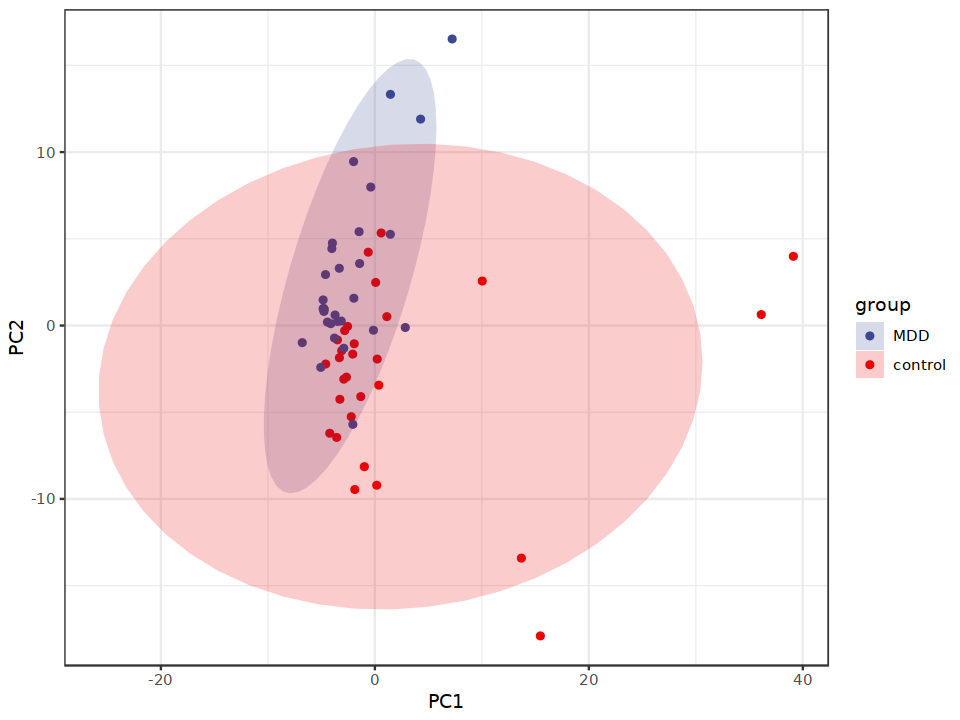

In [111]:
ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()
ggsave('Figure1.pca.pdf',width = 8,height = 8)

In [84]:
res = na.omit(diff3)

In [85]:
head(res,2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
MRPS6,-0.3387381,4.136118,-4.627532,2.100177e-05,0.3713953,2.2750740,NoSignifi
TUBD1,0.2830260,3.044158,4.092642,1.324473e-04,0.5136535,0.5159207,NoSignifi


In [86]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

In [87]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

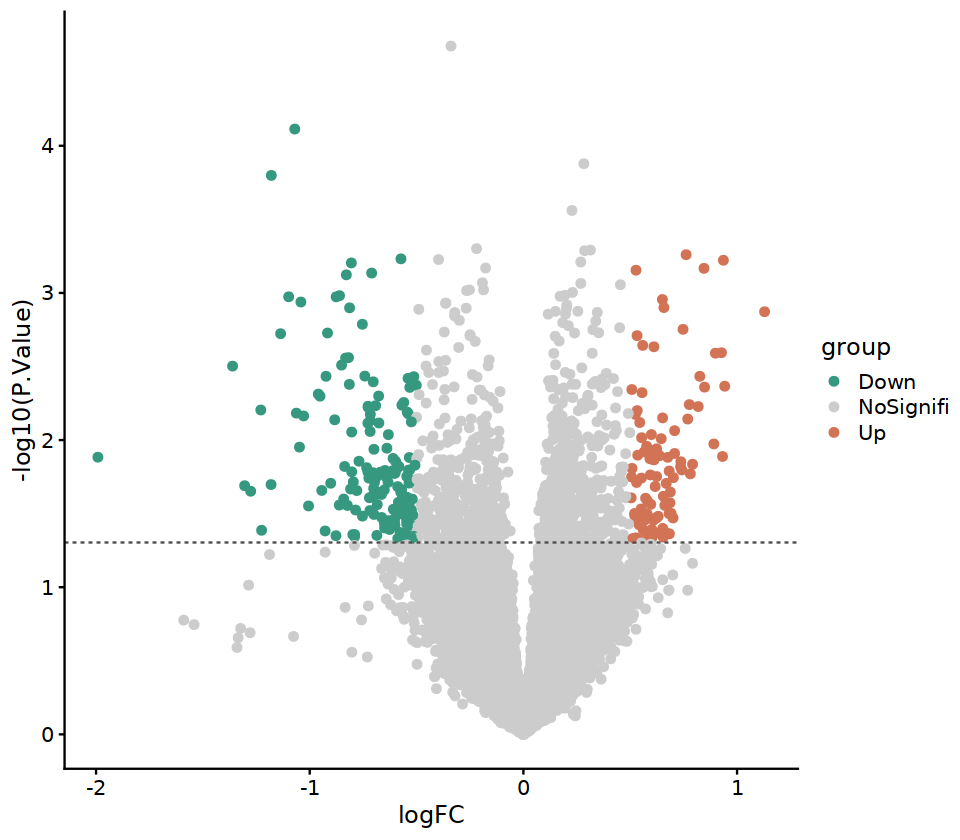

In [88]:
 ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

In [89]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [90]:
jiaoji = diff3 %>%  dplyr::filter(group != 'NoSignifi') %>%  rownames()

In [ ]:
# gene_symbol <- bitr(geneID = jiaoji,  
#                         fromType="SYMBOL",   
#                         toType=c("ENTREZID"),  
#                         OrgDb="org.Hs.eg.db")
#     gene <- gene_symbol[,2]
#     BP <- enrichGO(gene = gene,  
#                    keyType = "ENTREZID",  
#                    OrgDb=org.Hs.eg.db,  
#                    ont = "ALL",   
#                    pvalueCutoff = 0.05,  
#                    pAdjustMethod = "fdr", 
#                    minGSSize = 5,   
#                    maxGSSize = 500,  
#                    #qvalueCutoff = 0.05,  
#                    readable = TRUE) 



#  BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
#  BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc
#  BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf

# go = rbind(bp,cc,mf)

# library(ggplot2)
# library(RColorBrewer)
# display.brewer.all()
# color <- brewer.pal(3,"Dark2")
# colorl <- rep(color,each=10)
# go$Description<- factor(go$Description,levels=go$Description)

# options(repr.plot.width = 8)

# ggplot(go) +
#   aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip()+
#   geom_bar(stat = "identity",colour="black") +
#   #scale_fill_hue() +
#   scale_fill_manual(values =color)+
#   theme(
#     axis.title=element_text(size=15,face="plain",color="black"),
#     axis.text = element_text(size=12,face="plain",color="black"),
#     axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
#     axis.title.x = element_blank(),
#     legend.title = element_blank(),
#     legend.text = element_text(size = 8, face = "bold"),
#     legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
#     legend.direction = "horizontal",
#     legend.position = c(0.8,0.9),
#     legend.background = element_blank(),
#     panel.background = element_rect(fill = "transparent",colour = "black"),
    
#     plot.background = element_blank()
#   )
# ggsave('Figure1.74sample.GO.pdf',width = 8,height = 8)

In [91]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 0.01,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.01,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns



In [94]:
BP_res = simplify(BP)

In [116]:
load('enrichgo.rda')

In [117]:
intersect(BP_res@result$ID,id)

[1] "GO:0002526" "GO:0006959"

In [97]:
options(repr.plot.height = 6)

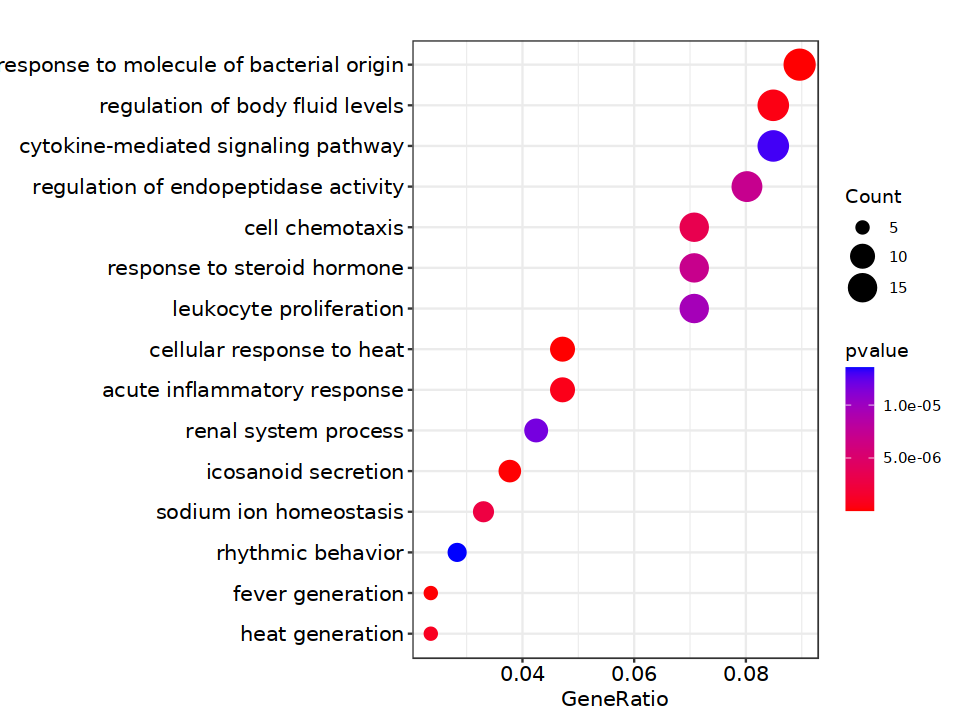

In [130]:
dotplot(BP_res,showCategory=15,color = "pvalue",label_format = 100)

In [194]:
BP_res@result['GO:0006959',]

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006959,GO:0006959,humoral immune response,12/212,320/18903,0.0002770259,0.009296609,0.0074399,CXCL14/IL1B/IFNW1/CCL2/WFDC3/CD28/IL6/HRG/CXCL10/IFNA13/CXCL2/IFNA1,12


### 获取goid gene

In [ ]:
 s = diff2 %>%  filter(group != 'NoSignifi') %>%  rownames()

library(tidyverse)
library(org.Hs.eg.db)
GOID <- c("GO:0002526")
GOgeneID <- get(GOID, org.Hs.egGO2ALLEGS) %>% mget(org.Hs.egSYMBOL) %>% unlist()

gen = data.frame(GOgeneID)

gen1 = gen$GOgeneID

gen2 = intersect(gen1,s)

data1 = log2(fpkm[gen2,]+1)

library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

library(pheatmap)
annotation_col = data.frame(group = group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

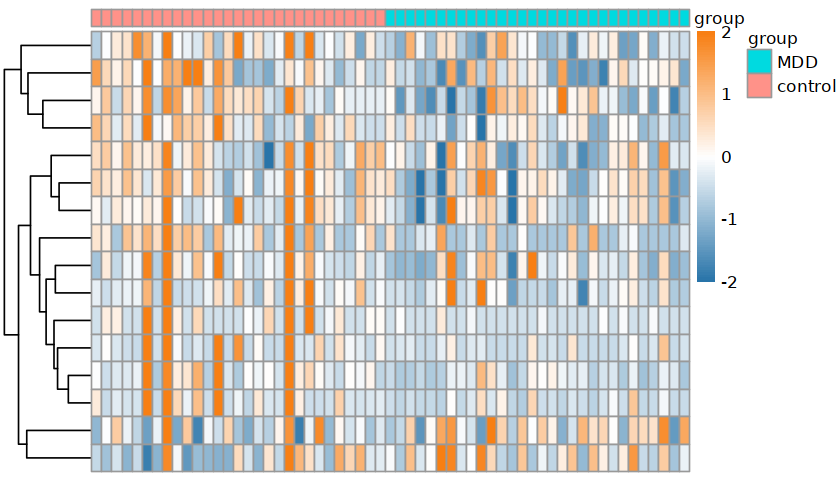

In [193]:
options(repr.plot.width = 7,repr.plot.height = 4)
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [195]:
gen2

[1] "CD6"     "EDNRB"   "EXT1"    "F3"      "B4GALT1" "IL1A"    "IL1B"   
 [8] "IL6"     "IL6R"    "LBP"     "PRCP"    "PTGS2"   "TFRC"    "TRPV1"  
[15] "IL31RA"  "C2CD4A"

In [258]:
diff2['EDNRB',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
EDNRB,-0.5450228,6.315925,-2.309214,0.02448233,0.7419041,-3.429919,Down
